# WeatherPy
----

#### Observations
* The plot of latitude versus maximum temperature shows a trend between the two variable, indicating that temperature has a relationship with latitude. The observed temperatures were be highest at around 20 degrees above the equator. Temperatures at latitudes above and below this point tend to be lower.
* The relationship between temperature and latitude looks like it could be fit with a second degree polynomial. Though the polynomial regression fit of Temperature = 78.45957112104767+ 0.3458145755763504*latitude + -0.011094358710342082*latitude^2 looks good, it does not have a very high R squared, 0.63. 
* Cloudiness and wind speed do not have visible trends with latutide.  In fact, the plot of latitude with each of these predictor variables results in points that appear to be randomly distributed.   
* There was an observed humidity with a value extremely different from the all other humidity readings in the sample.  The humidity recorded at Paita, PE was 290%, while all other humidity readings were below 110%. 290% humidity is not a realistic reading.  The data point should be removed for the comparison of latitude to humidity.
* The extreme obeservation was removed and the plot of latutide versus humidity looks uniformly distributed across all values of latitude, indicating that there is not a correlation between humidity and latitude.  


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country)

# Print the city count to confirm sufficient count
print(len(cities), len(countries))
#cities

600 600


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#import wrapper for cleaner coding and tqdm for progress bar
import openweathermapy.core as owm
from tqdm import tqdm_notebook

#base url defined
url = "http://api.openweathermap.org/data/2.5/weather?"

#Test data set
#cities = ["Houston", "Dallas","San Antonio", "Fakecity", "Spring"]
#countries = ["US","US","US","US","US"]

#combine city and country to fit wrapper format, define settings for wrapper
city_country = [f"{city},{countries[c]}" for c, city in enumerate(cities)]
settings = {"units": "imperial", "appid": api_key}

all_city_data = []
record_num = 1

print("Begin Data Retreival")
#loop through city list to pull weather information about each city, tqdm_notebook shows a progress bar 
for city in tqdm_notebook(city_country):
    try:
        #define url and obtain response
        weather_response = (owm.get_current(city, **settings))
        #indicate which variable to grab from the API response
        summary = ["name","sys.country", "coord.lat", "coord.lon","dt","main.temp_max","main.humidity","wind.speed","clouds.all"]
        city_data = weather_response(*summary)
        all_city_data.append(city_data)
        #print a confirmation that the record was pulled
        print(f"Processing Record {record_num}, city: {city} ") 
        record_num += 1
    except:
        #message if city is not in the API
        print(f"City {city} not found")

print("Data Retreival Complete")



Begin Data Retreival


Processing Record 1, city: saint-philippe,re 
Processing Record 2, city: khatanga,ru 
Processing Record 3, city: rikitea,pf 
Processing Record 4, city: hithadhoo,mv 
Processing Record 5, city: hobart,au 
City attawapiskat,ca not found
Processing Record 6, city: saskylakh,ru 
Processing Record 7, city: katsuura,jp 
Processing Record 8, city: port macquarie,au 
Processing Record 9, city: hirara,jp 
Processing Record 10, city: chokurdakh,ru 
Processing Record 11, city: sola,vu 
Processing Record 12, city: cape town,za 
Processing Record 13, city: ponta do sol,cv 
Processing Record 14, city: eyl,so 
Processing Record 15, city: bredasdorp,za 
Processing Record 16, city: srednekolymsk,ru 
City taolanaro,mg not found
Processing Record 17, city: kodiak,us 
Processing Record 18, city: margate,za 
City faya,td not found
City mys shmidta,ru not found
Processing Record 19, city: vaini,to 
Processing Record 20, city: puerto cabezas,ni 
City marcona,pe not found
Processing Record 21, city: voh,nc 
P

Processing Record 354, city: lorengau,pg 
Processing Record 355, city: mayumba,ga 
Processing Record 356, city: kurush,ru 
Processing Record 357, city: haines junction,ca 
Processing Record 358, city: loreto,mx 
Processing Record 359, city: venado tuerto,ar 
Processing Record 360, city: evensk,ru 
Processing Record 361, city: tura,ru 
Processing Record 362, city: salalah,om 
Processing Record 363, city: jobabo,cu 
Processing Record 364, city: tobol,kz 
Processing Record 365, city: koroni,gr 
Processing Record 366, city: yilan,cn 
Processing Record 367, city: diego de almagro,cl 
City khor,qa not found
City barbar,sd not found
Processing Record 368, city: kanigoro,id 
Processing Record 369, city: mananjary,mg 
Processing Record 370, city: marsh harbour,bs 
City airai,pw not found
Processing Record 371, city: nemuro,jp 
Processing Record 372, city: natalio,py 
Processing Record 373, city: torbay,ca 
Processing Record 374, city: fortuna,us 
Processing Record 375, city: narsaq,gl 
Processi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# name columns and convert to a datafram
column_names = ["City","Country","Latitude","Longitude","Date","Max Temperature","Humidity", "Wind Speed","Cloudiness"]
weather_data = pd.DataFrame(all_city_data, columns = column_names)

#Export data to csv
weather_data.to_csv(output_data_file, index=False)

#check number of rows for each variable
weather_data.count()

City               521
Country            521
Latitude           521
Longitude          521
Date               521
Max Temperature    521
Humidity           521
Wind Speed         521
Cloudiness         521
dtype: int64

In [5]:
#check the dataframe
weather_data.head()

,City,Country,Latitude,Longitude,Date,Max Temperature,Humidity,Wind Speed,Cloudiness
0,Saint-Philippe,RE,-21.36,55.77,1563831304,64.40,82,5.82,24
1,Khatanga,RU,71.98,102.47,1563831297,64.61,73,10.27,100
2,Rikitea,PF,-23.12,-134.97,1563831301,68.93,75,20.40,0
3,Hithadhoo,MV,-0.60,73.08,1563831317,83.15,76,10.83,74
4,Hobart,AU,-42.88,147.33,1563831323,48.99,70,10.29,89


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [6]:
#convert dates to m/d/y
dates = [datetime.utcfromtimestamp(int(d)).strftime('%m/%d/%Y') for d in weather_data["Date"]]
weather_data["Date"] = dates
#grab date value for chart title
weather_date = weather_data.iloc[0,4]
weather_data.head()

,City,Country,Latitude,Longitude,Date,Max Temperature,Humidity,Wind Speed,Cloudiness
0,Saint-Philippe,RE,-21.36,55.77,07/22/2019,64.40,82,5.82,24
1,Khatanga,RU,71.98,102.47,07/22/2019,64.61,73,10.27,100
2,Rikitea,PF,-23.12,-134.97,07/22/2019,68.93,75,20.40,0
3,Hithadhoo,MV,-0.60,73.08,07/22/2019,83.15,76,10.83,74
4,Hobart,AU,-42.88,147.33,07/22/2019,48.99,70,10.29,89


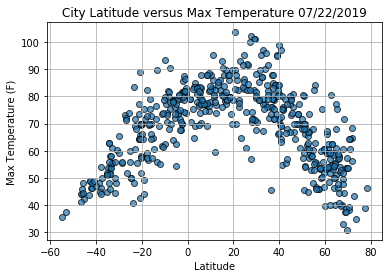

In [7]:
#scatter plot of the Latitude and temperature
plt.scatter(weather_data["Latitude"], weather_data["Max Temperature"], edgecolor = "k", alpha = .7)

#add title and labels
plt.title(f"City Latitude versus Max Temperature {weather_date}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

#save figure
plt.savefig("City Latitude vs Max Temperature.png")

#### Latitude vs. Tempurature Plot with polynomial regression fit

Fit is temperature = 78.45957112104767+ 0.3458145755763504*latitude + -0.011094358710342082*latitude^2
Residual Mean Squared Error is 8.862812571003888
R Squared is 0.6301005355541696


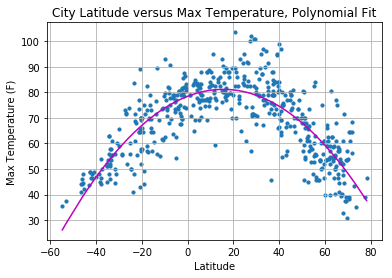

In [8]:
#Import Dependences
import operator
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

#define x and y variables for regression
x = weather_data["Latitude"]
y = weather_data["Max Temperature"]

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

#assign polynomial features, will use a second degree polynomial, perform regression fit and calculate fitted values
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)
#store coefficient vaules
fit_intercept = model.intercept_
fit_coef = model.coef_

fit_intercept = model.intercept_
fit_coef = model.coef_
coefs = fit_coef[0]
print(f"Fit is temperature = {fit_intercept[0]}+ {coefs[1]}*latitude + {coefs[2]}*latitude^2")

#calculate RMSE and R squared
rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(f"Residual Mean Squared Error is {rmse}")
print(f"R Squared is {r2}")

#Plot the data
plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
#plot fit of data
plt.plot(x, y_poly_pred, color='m')

#add title and labels
plt.title("City Latitude versus Max Temperature, Polynomial Fit")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

#save figure
plt.savefig("City Latitude vs Max Temperature Polynomial Regression Fit.png")

#### Latitude vs. Humidity Plot

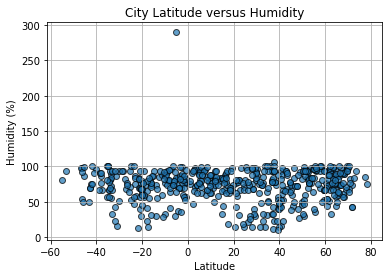

In [9]:
# plot latitude vs humidity
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], edgecolor = "k", alpha = .7)

#add title and labels
plt.title("City Latitude versus Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

#save figure
plt.savefig("City Latitude vs Humidity.png")

In [15]:
#look at outlier observation
outlier_obs = weather_data.loc[weather_data['Humidity'] >150]
weather_data_otl_rem = weather_data.loc[weather_data['Humidity']<=150]
outlier_obs2 = outlier_obs.iloc[0,:]
outlier_obs2

City                    Paita
Country                    PE
Latitude                -5.09
Longitude              -81.11
Date               07/22/2019
Max Temperature          62.6
Humidity                  290
Wind Speed              12.75
Cloudiness                  0
Name: 513, dtype: object

The humidity recorded at Paita, PE was 290%.


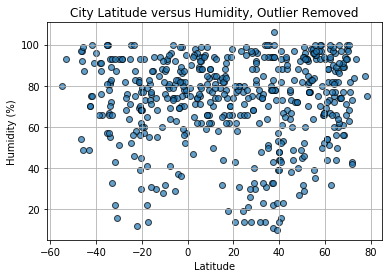

In [18]:
#plot latitude vs humidity
plt.scatter(weather_data_otl_rem["Latitude"], weather_data_otl_rem["Humidity"], edgecolor = "k", alpha = .7)

#add title and labels
plt.title("City Latitude versus Humidity, Outlier Removed")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
print(f"The humidity recorded at {outlier_obs2['City']}, {outlier_obs2['Country']} was {outlier_obs2['Humidity']}%.")
#save figure
plt.savefig("City Latitude vs Humidity, Outlier Removed.png")

#### Latitude vs. Cloudiness Plot

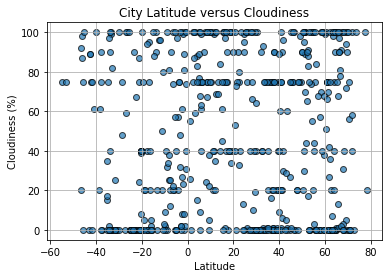

In [10]:
#plot latitude vs cloudiness
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], edgecolor = "k", alpha = .7)

#add title and labels
plt.title("City Latitude versus Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

#save figure
plt.savefig("City Latitude vs Cloudiness.png")

#### Latitude vs. Wind Speed Plot

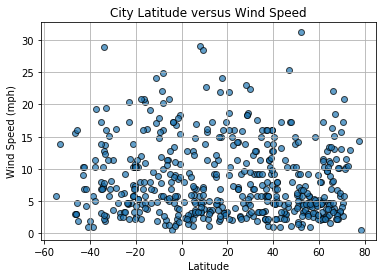

In [11]:
#plot latitude vs wind speed
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], edgecolor = "k", alpha = .7)

#add title and labels
plt.title("City Latitude versus Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

#save figure
plt.savefig("City Latitude vs Wind Speed.png")